NYC Airbnb Data Analysis Project

In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

path = kagglehub.dataset_download("vrindakallu/new-york-dataset")
df = pd.read_csv(f'{path}/new_york_listings_2024.csv')

In [3]:
print(df)

                       id                                               name   
0                 1312228         Rental unit in Brooklyn · ★5.0 · 1 bedroom  \
1                45277537  Rental unit in New York · ★4.67 · 2 bedrooms ·...   
2      971353993633883038  Rental unit in New York · ★4.17 · 1 bedroom · ...   
3                 3857863  Rental unit in New York · ★4.64 · 1 bedroom · ...   
4                40896611  Condo in New York · ★4.91 · Studio · 1 bed · 1...   
...                   ...                                                ...   
20753            24736896  Rental unit in New York · ★4.75 · 1 bedroom · ...   
20754             2835711  Rental unit in New York · ★4.46 · 1 bedroom · ...   
20755            51825274  Rental unit in New York · ★4.93 · 1 bedroom · ...   
20756  782661008019550832  Rental unit in New York · ★5.0 · 1 bedroom · 1...   
20757  566029911248687183  Rental unit in Queens · ★4.89 · 1 bedroom · 1 ...   

         host_id           host_name ne

Exploring the DataFrame

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


Data Cleaning

In [6]:
missing_data = df.isnull().sum()
print(missing_data)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64


In [7]:
duplicates = df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
20753    False
20754    False
20755    False
20756    False
20757    False
Length: 20758, dtype: bool


In [8]:
df['last_review'] = pd.to_datetime(df['last_review'], errors = 'coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20758 non-null  int64         
 1   name                            20758 non-null  object        
 2   host_id                         20758 non-null  int64         
 3   host_name                       20758 non-null  object        
 4   neighbourhood_group             20758 non-null  object        
 5   neighbourhood                   20758 non-null  object        
 6   latitude                        20758 non-null  float64       
 7   longitude                       20758 non-null  float64       
 8   room_type                       20758 non-null  object        
 9   price                           20758 non-null  float64       
 10  minimum_nights                  20758 non-null  int64         
 11  nu

Exploratory Data Analysis (EDA)

In [10]:
relevant_columns = ['price', 'minimum_nights', 'number_of_reviews',
                    'reviews_per_month', 'calculated_host_listings_count',
                    'availability_365', 'bedrooms', 'beds', 'baths', 'rating']

In [11]:
df[relevant_columns].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,beds
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,1.723721
std,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,1.212272
min,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,1.000000
25%,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000
50%,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,1.000000
75%,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,2.000000
max,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,42.000000


Visualizing Key Variables

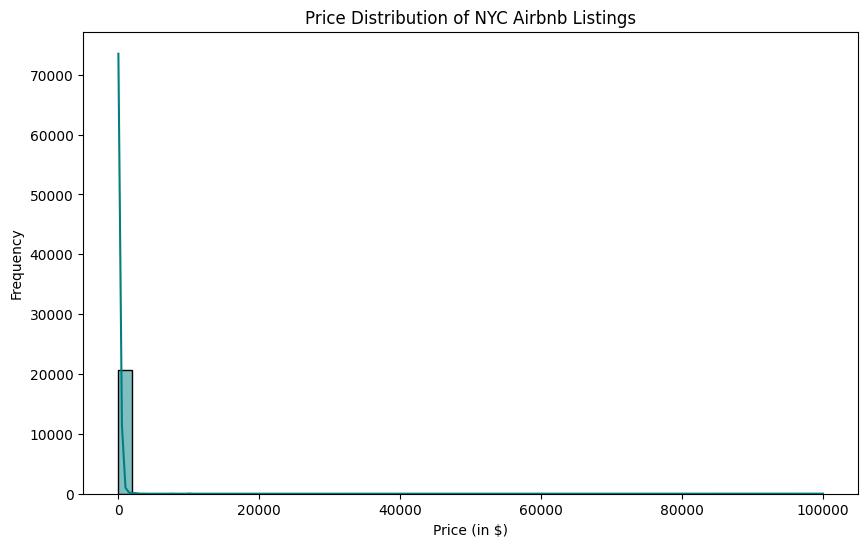

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins = 50, kde = True, color = 'teal')
plt.xlabel('Price (in $)')
plt.ylabel('Frequency')
plt.title('Price Distribution of NYC Airbnb Listings')
plt.show()

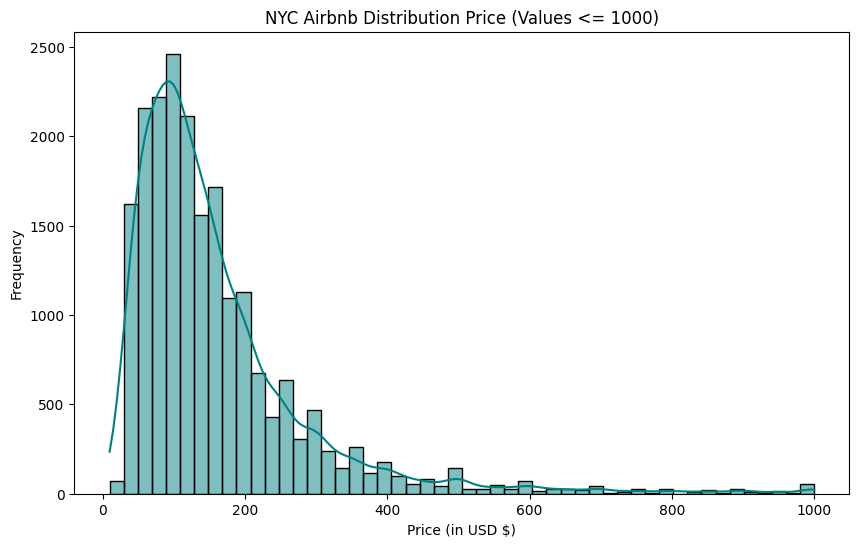

In [13]:
# So, we have to remove the outliers
filtered_df = df[df['price'] <= 1000]
plt.figure(figsize = (10, 6))
sns.histplot(filtered_df['price'], kde = True, bins = 50, color = 'teal')
plt.title('NYC Airbnb Distribution Price (Values <= 1000)')
plt.xlabel('Price (in USD $)')
plt.ylabel('Frequency')
plt.show()

In our case, the presence of a few very expensive listings (outliers) distorted our price distribution visualizations, making it hard to analyze the more typical price range for most Airbnb listings.

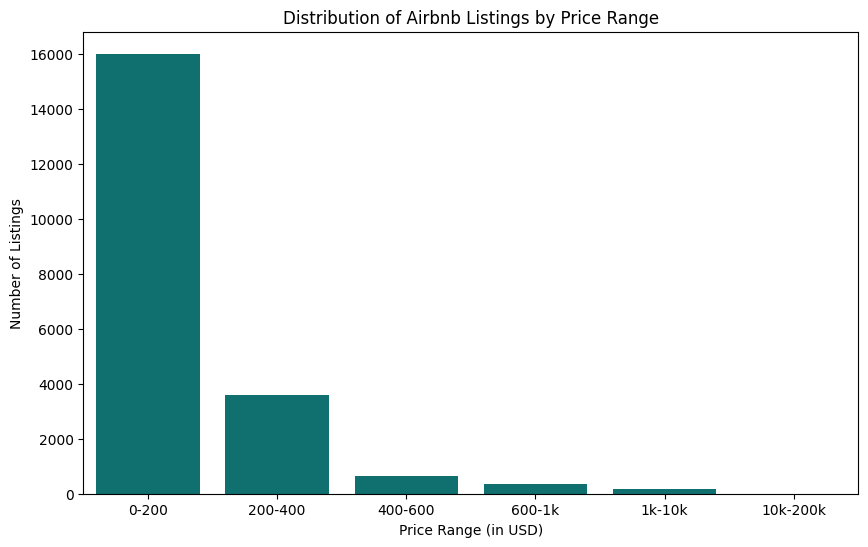

In [28]:
bin = [0, 200, 400, 600, 1000, 10000,200000]
bins_labels = ['0-200', '200-400', '400-600', '600-1k', '1k-10k','10k-200k']

df['price_bin'] = pd.cut(df['price'], bins=bin, labels=bins_labels, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(x='price_bin', data=df, color='teal')
plt.title('Distribution of Airbnb Listings by Price Range')
plt.xlabel('Price Range (in USD)')
plt.ylabel('Number of Listings')
plt.show()

We can notice that the majority of Airbnb listings fall within the $0-200 price range, with a significant portion of listings also priced between $200-400. There are fewer listings in the $400-600 range, and the number of listings dramatically decreases beyond $600 .

Only a small number of listings are priced above $1,000 , and extremely high-priced listings (e.g., above $10,000 ) represent a very small fraction of the data. These outliers can distort visualizations and make it difficult to focus on the majority of listings, which are priced at more typical levels.

In [30]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price_bin
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1,0,0,No License,5.0,1,1,Not specified,0-200
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139,364,2,No License,4.67,2,1,1,0-200
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1,343,6,Exempt,4.17,1,2,1,0-200
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2,363,12,No License,4.64,1,1,1,0-200
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133,335,3,No License,4.91,Studio,1,1,0-200


Visualizing Price Distribution Across Room Types

C:\Users\muspo\AppData\Local\Temp\ipykernel_124\3547007035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['price_bin'] = pd.cut(filtered_df['price'], bins = bins, labels = bin_labels, include_lowest = True)


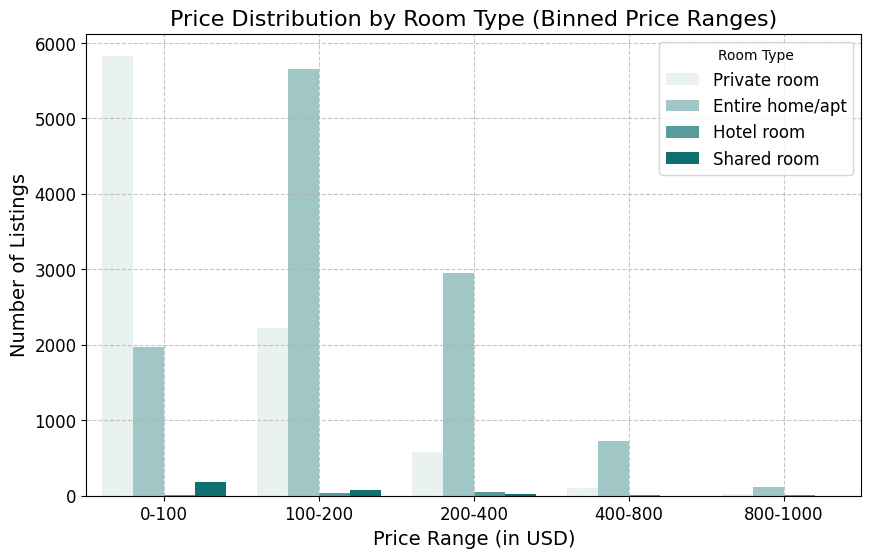

In [38]:
bins = [0, 100, 200, 400, 800, 1000]
bin_labels = ['0-100', '100-200', '200-400', '400-800', '800-1000']

filtered_df['price_bin'] = pd.cut(filtered_df['price'], bins = bins, labels = bin_labels, include_lowest = True)

plt.figure(figsize = (10, 6))
sns.countplot(x='price_bin', hue = 'room_type', data = filtered_df, color = 'teal')

plt.title('Price Distribution by Room Type (Binned Price Ranges)', fontsize=16)
plt.xlabel('Price Range (in USD)', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Room Type', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The majority of Airbnb listings are concentrated in the lower price ranges, particularly for private rooms and entire homes/appartments. This reinforces the notion that Airbnb is largely a platform for more affordable, short-term stays. As prices increase, the number of listings decreases significantly, with only a few high-end listings surpassing $1000 USD.

In [39]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price_bin
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1,0,0,No License,5.0,1,1,Not specified,0-200
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139,364,2,No License,4.67,2,1,1,0-200
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1,343,6,Exempt,4.17,1,2,1,0-200
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2,363,12,No License,4.64,1,1,1,0-200
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133,335,3,No License,4.91,Studio,1,1,0-200


Relationship Between Price and Number of Reviews

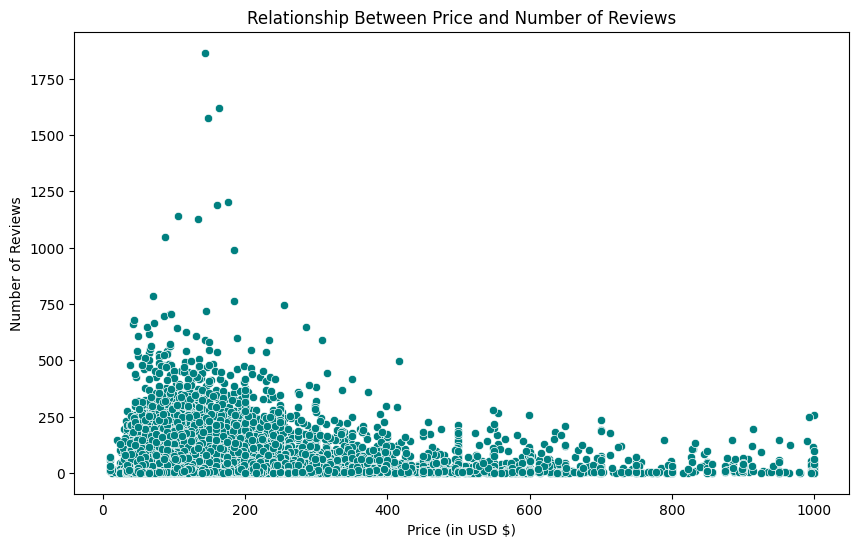

In [40]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'price', y = 'number_of_reviews', data = filtered_df, color = 'teal')
plt.title('Relationship Between Price and Number of Reviews')
plt.xlabel('Price (in USD $)')
plt.ylabel('Number of Reviews')
plt.show()

Lower-priced listings (below $1,000 USD) tend to have more reviews, with many reaching over 500 reviews. This suggests that affordable listings are booked more often, leading to more reviews.

Higher-priced listings (above $2,000 USD) generally have fewer reviews, indicating that luxury or high-cost properties are booked less frequently, possibly catering to a more selective audience.

In [41]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price_bin
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1,0,0,No License,5.0,1,1,Not specified,0-200
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139,364,2,No License,4.67,2,1,1,0-200
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1,343,6,Exempt,4.17,1,2,1,0-200
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2,363,12,No License,4.64,1,1,1,0-200
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133,335,3,No License,4.91,Studio,1,1,0-200


Average Price of Airbnb Listings by Neighborhood Group

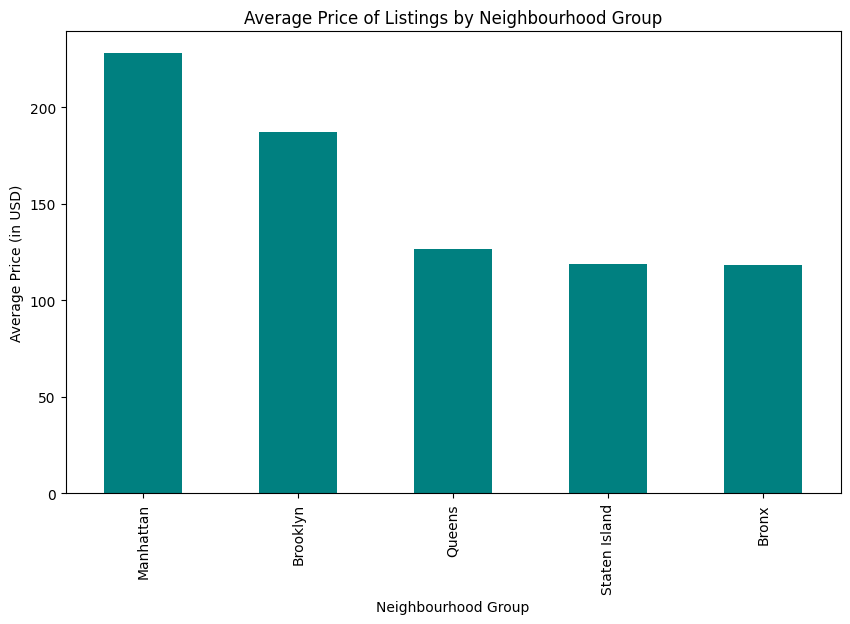

In [42]:
average_price_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_price_neighbourhood.plot(kind='bar', color='teal')
plt.title('Average Price of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price (in USD)')
plt.show()

Manhattan tops the chart with average prices over $200 USD per night. This makes sense since it’s a prime location with high demand.

Brooklyn comes in next, with listings averaging around $150 USD—a popular, slightly more affordable option compared to Manhattan.

Queens, Staten Island, and the Bronx offer the most budget-friendly stays, all averaging under $100 USD per night, making them great choices for travelers looking for affordability.